# Imports

In [9]:
# To install Yahoo API run:
#!sudo /bin/bash -c "(source /venv/bin/activate; pip install yfinance)"
import logging

import pandas as pd
import yfinance as yf

import core.plotting.plotting_utils as cplpluti
import helpers.hdbg as hdbg
import helpers.hpandas as hpandas
import helpers.hprint as hprint

In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-aaa0c5ea-133d-434c-99d6-d314262b4bbc.json'


# Load the data

In [3]:
sp500_data = yf.download("^GSPC", start="2019-01-01", end="2022-05-07")
btc_data = yf.download("BTC-USD", start="2019-01-01", end="2022-05-07")
display(sp500_data.head(3))
display(btc_data.head(3))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219


# Compute and plot returns' volatility

In [4]:
cplpluti.configure_notebook_for_presentation()

In [5]:
def get_rolling_vix_for_rets(df, price_col, lookback_in_samples):
    srs = df[price_col].pct_change().rolling(lookback_in_samples).std()
    return srs

INFO  removed rows with nans: 400 / 1223 = 32.71%


,SP500_Volatility,BTC_Volatility
Date,,
2019-02-01,0.011682,0.017641
2019-02-04,0.009706,0.013626
2019-02-05,0.007040,0.013082


<AxesSubplot:xlabel='Date'>

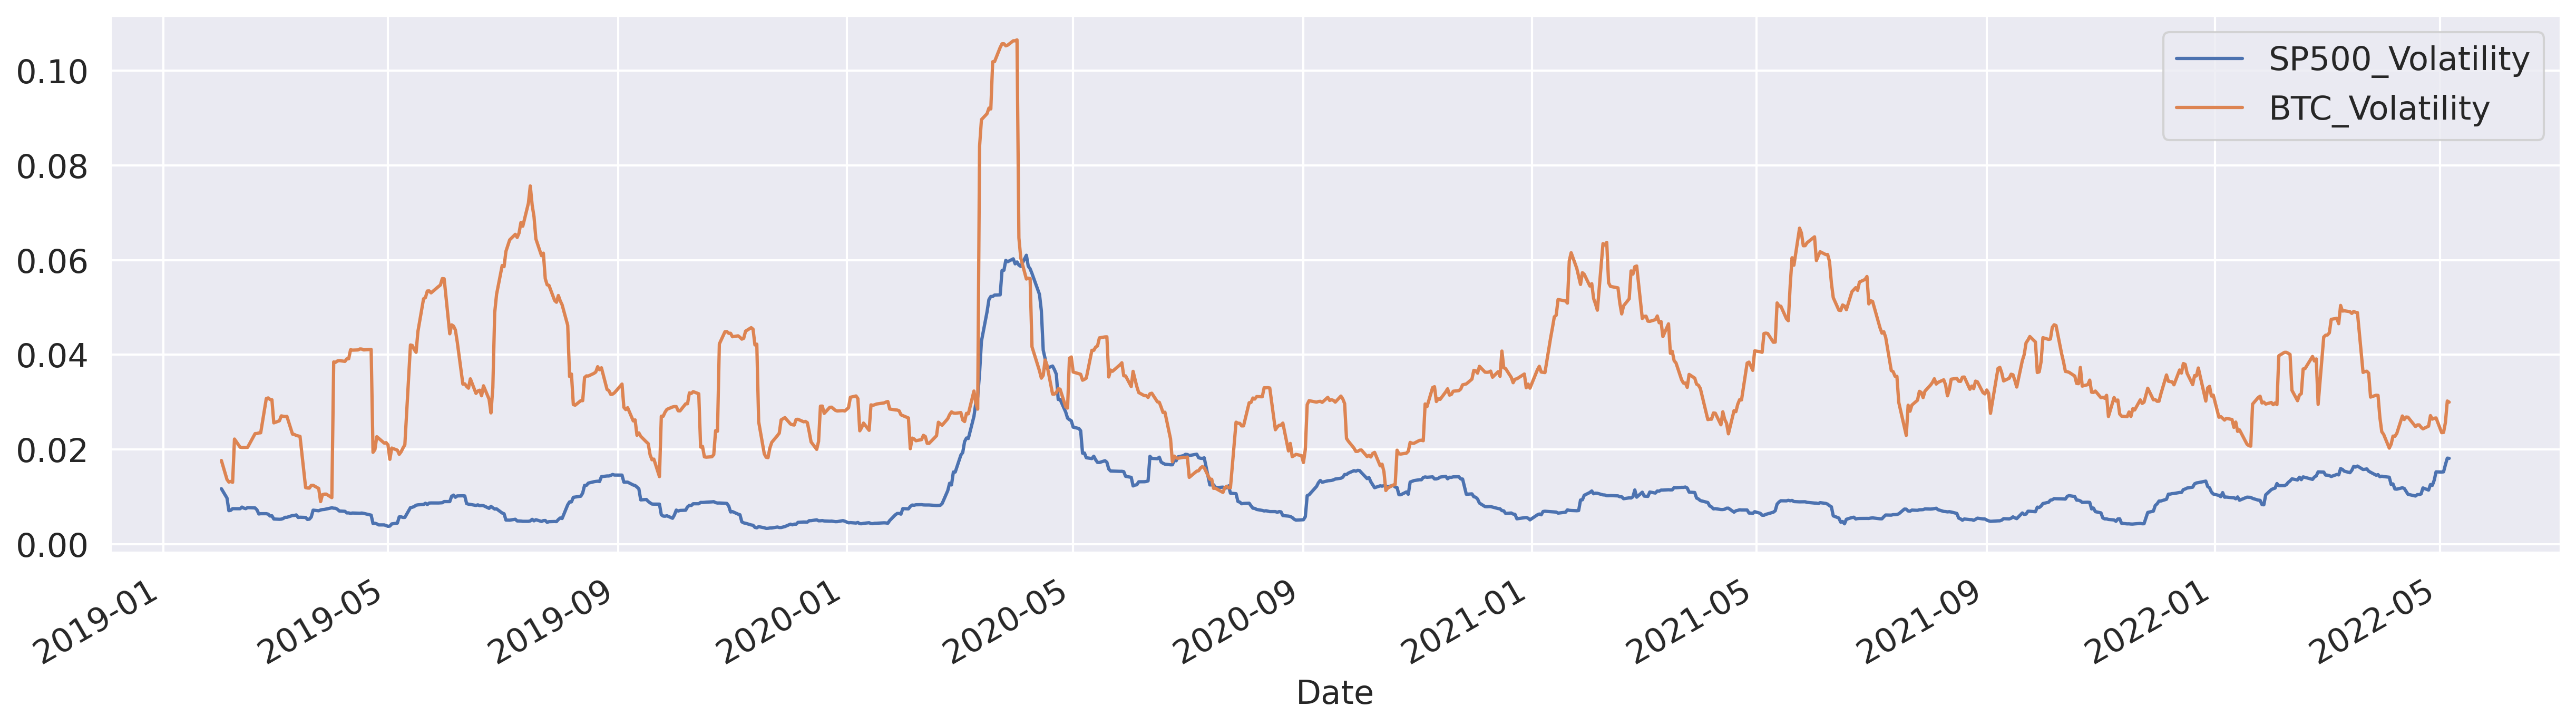

In [6]:
sp500_vix = get_rolling_vix_for_rets(sp500_data, "Adj Close", 21).rename(
    "SP500_Volatility"
)
btc_vix = get_rolling_vix_for_rets(btc_data, "Adj Close", 21).rename(
    "BTC_Volatility"
)
df = pd.concat([sp500_vix, btc_vix], axis=1)
df = hpandas.dropna(df, report_stats=True)
display(df.head(3))
df.plot(figsize=(20, 5))

,Returns Volatility for given period
S&P 500,0.010956
BTC,0.035106


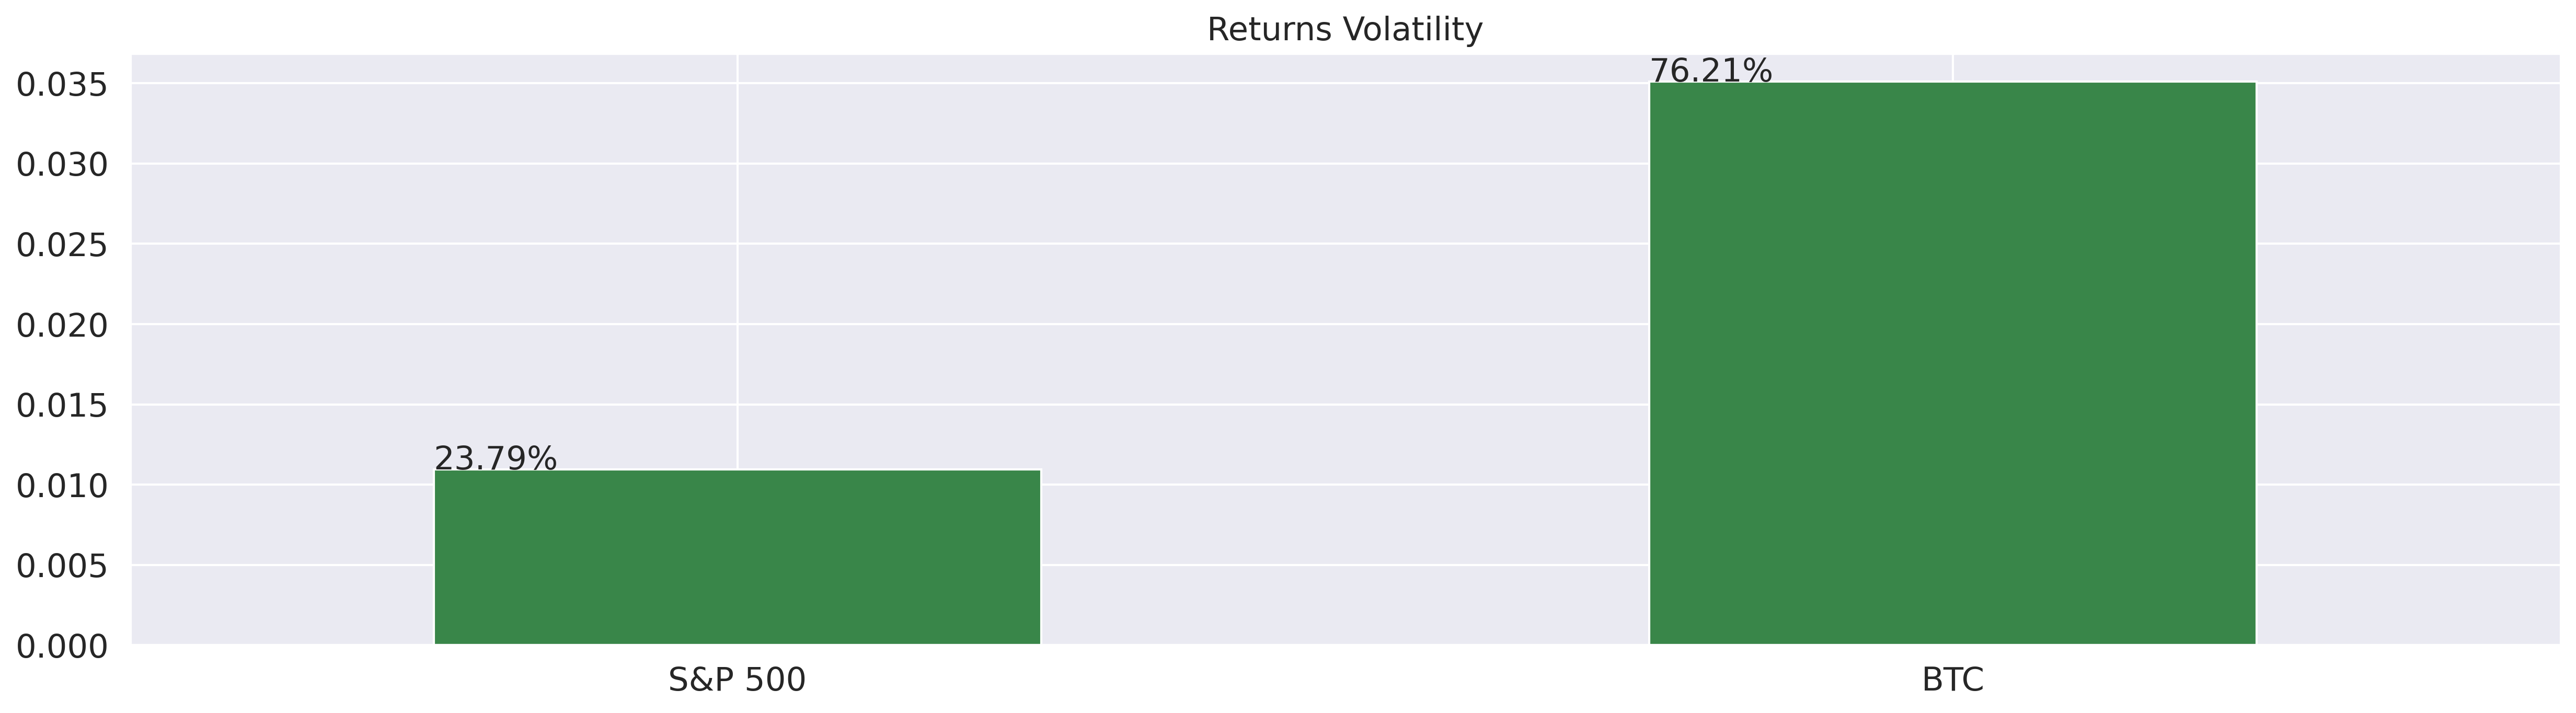

In [7]:
# General mean value of volatility for a given period.
general_vix = pd.DataFrame()
general_vix.loc[
    "S&P 500", "Returns Volatility for given period"
] = sp500_vix.mean()
general_vix.loc["BTC", "Returns Volatility for given period"] = btc_vix.mean()
display(general_vix)
cplpluti.plot_barplot(
    general_vix["Returns Volatility for given period"], title="Returns Volatility"
)